# 绘制各类别准确率评估指标柱状图

## 设置Matplotlib中文字体

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [3]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [4]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

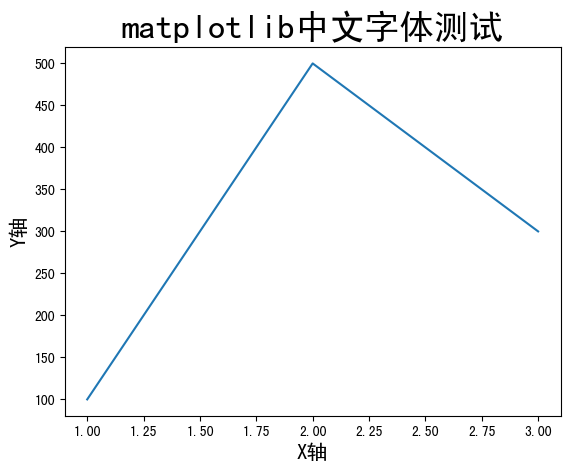

In [5]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入工具包

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dataset_name = 'test_easy_classes'
model_path = 'models/2023-09-24-15:52_max_epoch_50/'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 导入各类别准确率评估指标表格

In [9]:
df = pd.read_csv(model_path + dataset_name + '-各类别准确率评估指标.csv')

In [10]:
df

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,covering,0.529412,0.342105,0.415631,342.0,0.342105,0.473534,0.906741
1,device,0.678063,0.583333,0.627141,408.0,0.583333,0.677248,0.931102
2,domestic_animal,0.880240,0.928421,0.903689,475.0,0.928421,0.949062,0.993123
3,mater,0.692748,0.758621,0.724190,957.0,0.758621,0.789442,0.931061
4,person,0.827562,0.865942,0.846317,1380.0,0.865942,0.896050,0.958644
5,plant,0.766917,0.809524,0.787645,252.0,0.809524,0.876592,0.988230
6,structure,0.512821,0.500000,0.506329,240.0,0.500000,0.535401,0.936459
7,vertebrate,0.841121,0.824176,0.832562,546.0,0.824176,0.882693,0.960312
8,macro avg,0.716110,0.701515,0.705438,4600.0,0.701515,0.760003,0.950709
9,weighted avg,0.751394,0.758913,0.752788,4600.0,0.758913,0.807057,0.950826


## 选择评估指标

In [13]:
feature = 'precision'
# feature = 'recall'
# feature = 'f1-score'
# feature = 'accuracy'
# feature = 'AP'
# feature = 'AUC'

## 绘制柱状图

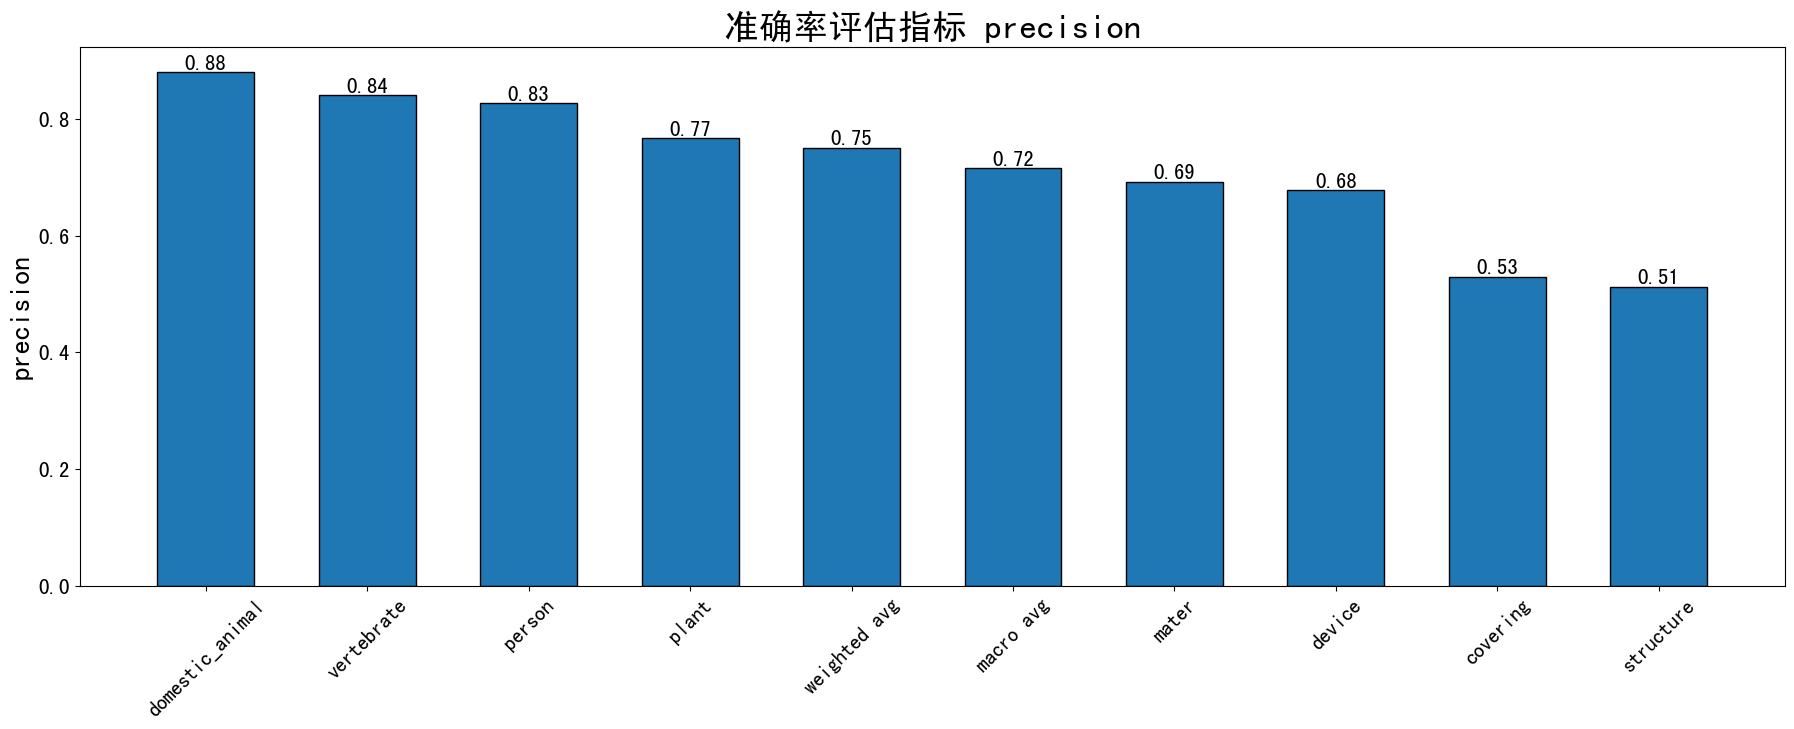

In [14]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig(model_path + dataset_name + '-各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()